
### The dataset is all about titles of shows which are streamed on Netflix.
##### show_id: int64 : Unique id of a show
##### type: object : Whether it is a Movie or a TV show
##### title: object : Title of that show
##### director: object : Name of director of that Movie/Show
##### cast: object : Cast of the film
##### country: object : Origin country of the Movie/Show
##### date_added: object : Date on which it is listed on Netflix
##### release_year: int64 : Release year of the Movie/Show
##### rating: object : Rating or Class of that Movie/Show
##### duration: object : Total duration of a Movie/Show

## Inferences From the Project 
#### 1. What percent of Movies and TV Shows are there in the datset 
#### 2. In which Year , maximum number of TV shows listed on Netflix
#### 3. In which Year, maximum number of Movies listed on Netflix
#### 4. What is the average duration of all movies .
#### 5. Top 3 countries releasing maximum movies on Netflix .
#### 6. Number of movies originated from Inida since 2015
#### 7. Most POpular Directors of TV shows and movies together  
#### 8. Top 5 most popular Movie Genres 
#### 9.  Top 5 most popular Show Genres 
#### 10. Over the time, Netflix has listed shorter movies in duration or longer , Estimate the Average  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
netflix=pd.read_csv('netflix_titles.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
netflix.shape

(6234, 12)

In [7]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Percent of TV shows and Movies 

In [8]:
netflix['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

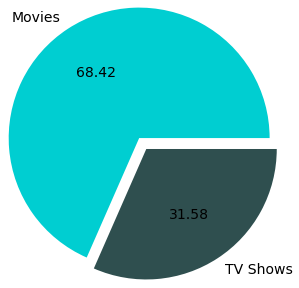

In [9]:


plt.pie(netflix['type'].value_counts(),autopct='%.2f',explode=(0,0.15),labels=['Movies','TV Shows'],radius=1.5,colors=['darkturquoise','darkslategray'],textprops={'fontsize':14})

plt.show()

### The above pie chart gives us the exact percentage of Movies and TV Shows that are present in the dataset
#### Movies : 68.42%
#### TV Shows : 31.58%

## Year with maximum number of TV shows 

In [10]:
netflix_tv_shows=netflix[netflix['type']=='TV Show']

In [11]:
netflix_tv_shows['date_added'].value_counts().head(5)

January 1, 2016     21
August 1, 2017      18
February 1, 2019    17
July 1, 2017        15
July 12, 2019       14
Name: date_added, dtype: int64

In [12]:
netflix_tv_shows['date_added']=pd.to_datetime(netflix_tv_shows['date_added'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
netflix_tv_shows['year_added']=netflix_tv_shows['date_added'].dt.year

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
x=netflix_tv_shows['year_added'].value_counts().index
y=netflix_tv_shows['year_added'].value_counts().values

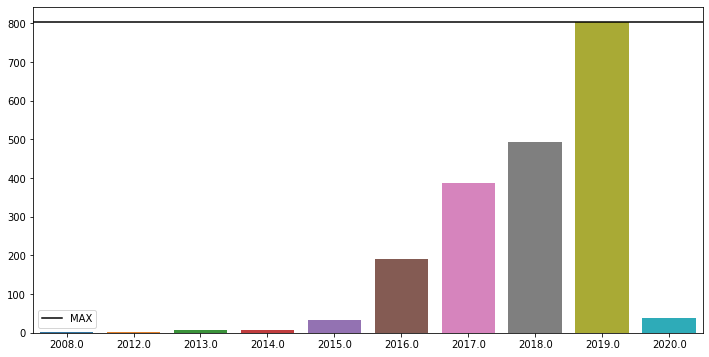

In [15]:
plt.figure(figsize=(12,6))
plt.axhline(y.max(),color='black',label='MAX')
plt.legend()
sns.barplot(x,y)
plt.show()

In [16]:
netflix[netflix['date_added'].isna()]['type'].value_counts()

TV Show    10
Movie       1
Name: type, dtype: int64

#### From the above Bar Graph it is evident that Netflix has added maximum TV Show titles in the year 2019 

##### Provided that there is no date available for 10 TV Shows 

## Year with the maximum number of Movies 

In [17]:
netflix_movies=netflix[netflix['type']=='Movie']

In [18]:
netflix_movies['date_added']=pd.to_datetime(netflix_movies['date_added'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
netflix_movies['year_added']=netflix_movies['date_added'].dt.year

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
netflix_movies['year_added'].value_counts()

2019.0    1546
2018.0    1290
2017.0     913
2016.0     264
2020.0     147
2015.0      58
2014.0      19
2011.0      13
2013.0       6
2012.0       4
2009.0       2
2010.0       1
2008.0       1
Name: year_added, dtype: int64

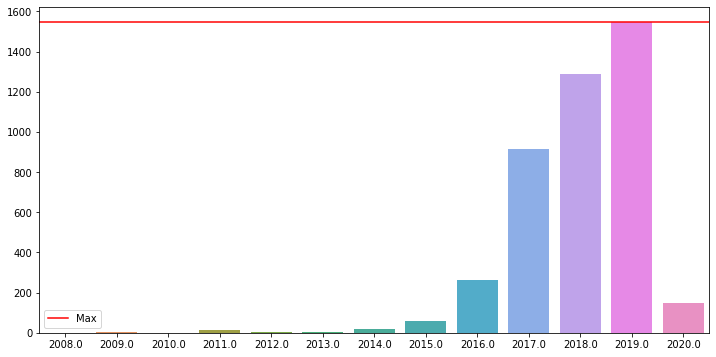

In [21]:
x=netflix_movies['year_added'].value_counts().index
y=netflix_movies['year_added'].value_counts().values
plt.figure(figsize=(12,6))
plt.axhline(np.max(y),color='r',label='Max')
sns.barplot(x,y)
plt.legend()
plt.show()

In [22]:
netflix_movies['year_added'].isna().sum()

1

#### From the above bar graph we can clearly see that the maximum movie titles are added to Netflix in the year 2019 
##### Provided the year added for 1 title is not available 

## AVERAGE DURATION OF ALL THE MOVIES

In [23]:
def split(x):
    y=x.split(' ')
    return y[0]
netflix_movies['duration']=netflix_movies['duration'].apply(split)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
netflix_movies['duration']=pd.to_numeric(netflix_movies['duration'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


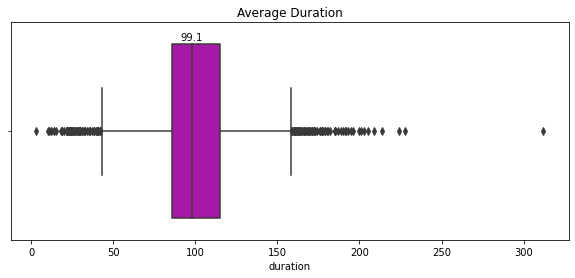

In [25]:
plt.figure(figsize=(10,4))
plt.text(np.mean(netflix_movies['duration'])-8,-0.42,round(np.mean(netflix_movies['duration']),2))
plt.title('Average Duration')
plt.xlabel('Duration')
sns.boxplot(netflix_movies['duration'],color='m')
plt.show()

#### The above graph shows the mean duration of all the netflix movies combined , value of the mean of the duration is 99.1 minutes 

## TOP 3 Countries releasing movies on Netflix

In [26]:

netflix_movies['country'].value_counts().sort_values(ascending=False).head(3)

United States     1482
India              724
United Kingdom     170
Name: country, dtype: int64

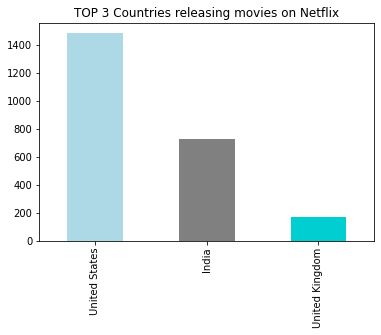

In [27]:
plt.title('TOP 3 Countries releasing movies on Netflix')
netflix_movies['country'].value_counts().sort_values(ascending=False).head(3).plot(kind='bar',color=['lightblue','grey','darkturquoise'])
plt.show()

#### US releases the maximum no. of movies i.e 1482 by a far margin as compared to second and third countries .
#### India stands second with 724 releases  which is fairly a higher number of titles than the 3rd rank country . 
#### UK stands third releasing around 170 titles on Netflix

## MOVIES FROM INDIA SINCE 2015

In [28]:
netflix_india=netflix_movies[netflix_movies['country']=='India']

In [29]:
netflix_india['release_year']=pd.to_numeric(netflix_india['release_year'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
since_2015=netflix_india[netflix_india['release_year']>=2015]['release_year']
since_2015.value_counts()

2017    99
2018    79
2016    66
2015    53
2019    49
2020     1
Name: release_year, dtype: int64

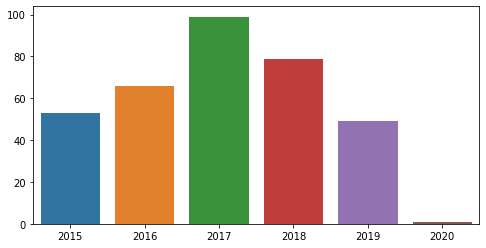

In [31]:
plt.figure(figsize=(8,4))
sns.barplot(x=since_2015.value_counts().index,y=since_2015.value_counts().values)
plt.show()

### Since 2015 India has released 347 Movies on Netflix out of which 99 in 2017,79 in 2018,66 in 2016,53 in 2015,49 in 2019 and 1 in 2020

## MOST POPULAR DIRECTORS 

In [32]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [35]:
netflix_director=netflix[netflix['director'].isna()==False]

In [41]:
netflix_director['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
                          ..
Eric Khoo                  1
Stefan Brogren             1
Heber Cannon               1
Hayao Miyazaki             1
Gabriela Cowperthwaite     1
Name: director, Length: 3301, dtype: int64

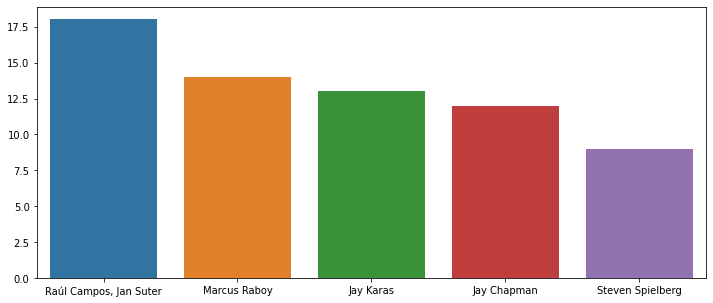

In [44]:
plt.figure(figsize=(12,5))
x=netflix_director['director'].value_counts().head(5).index
y=netflix_director['director'].value_counts().head(5).values        
sns.barplot(x,y)
plt.show()

### Raul Campos, Jan Suter , Marcus Raboy, JAy karas , Jay Chapman and Steven Spielberg  are the top 5 most famous directors according to the Netflix data 

## Top 5 Movie Genres 

In [53]:
netflix_movies['listed_in'].value_counts().head(5)

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Name: listed_in, dtype: int64

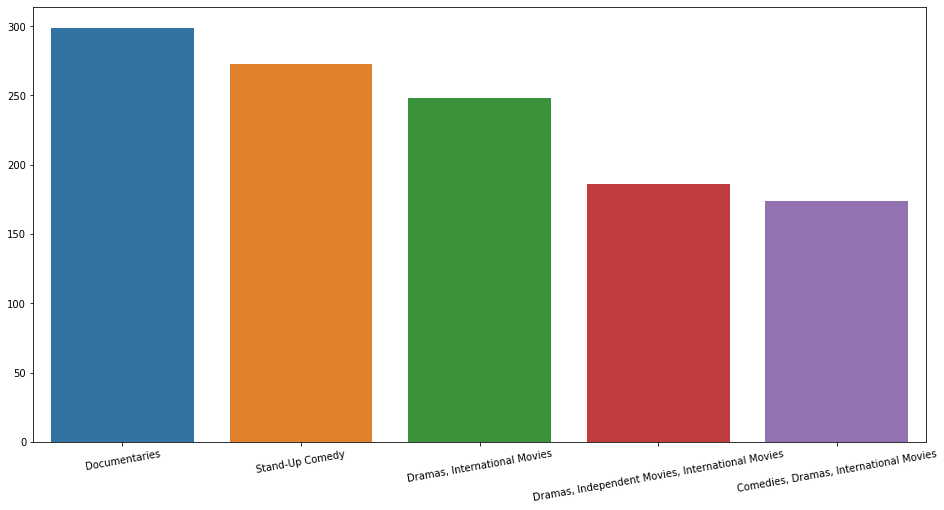

In [66]:
x=netflix_movies['listed_in'].value_counts().head(5).index
y=netflix_movies['listed_in'].value_counts().head(5).values
plt.figure(figsize=(16,8))
sns.barplot(x,y)
plt.xticks(rotation=10)
plt.show()

In [77]:
netflix_tv_shows['listed_in'].value_counts().head(6)

Kids' TV                                                  159
International TV Shows, TV Dramas                          92
Crime TV Shows, International TV Shows, TV Dramas          92
International TV Shows, Romantic TV Shows, TV Dramas       78
Kids' TV, TV Comedies                                      75
International TV Shows, Romantic TV Shows, TV Comedies     66
Name: listed_in, dtype: int64

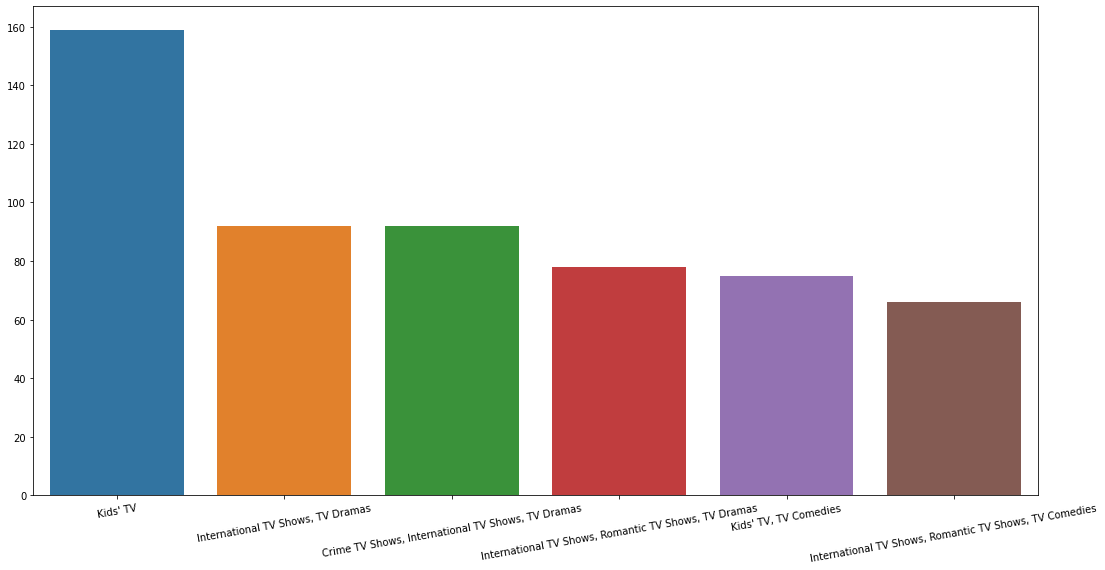

In [78]:
x=netflix_tv_shows['listed_in'].value_counts().head(6).index
y=netflix_tv_shows['listed_in'].value_counts().head(6).values
plt.figure(figsize=(18,9))
sns.barplot(x,y)
plt.xticks(rotation=10)
plt.show()

In [92]:
result=netflix_movies.groupby('year_added').mean()['duration']

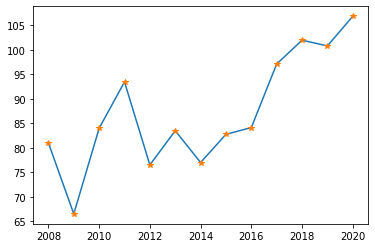

In [103]:
plt.plot(result)
plt.plot(result,'*')
plt.show()

#### Evidently from the graph we can see that there is no particular trend regarding the average duration of the movies over the years . Starting from 2008 the mean decreased to a significant amount of time and then increased and increased till 2011, after which it declined again in 2012 only to grow in 2013, declined again in 2014 , but after 2014 we can see that the average duration of movies kept on increasing and is the highest in the year 2020 .... 